<a href="https://colab.research.google.com/github/syx1990/deep-learning/blob/main/fashion_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

流式输出内容被截断，只能显示最后 5000 行内容。
         9.33209881e-02, -1.73990857e-02,  2.98202395e-01,
         1.09632732e-02,  1.50709644e-01,  5.02603576e-02,
         1.33618504e-01,  1.44967288e-01, -6.47867098e-02,
         1.38247004e-02,  2.79670864e-01, -2.80358586e-02,
         1.27109364e-01, -3.61775547e-01,  1.10988781e-01,
         1.65147752e-01, -1.51340263e-02,  4.12862375e-02,
        -9.48322415e-02,  1.90505669e-01, -1.00190796e-01,
         3.06045003e-02,  3.73266973e-02, -4.16446663e-02,
         1.42900839e-01,  3.44379932e-01,  2.04907298e-01,
        -5.45810610e-02, -1.55735482e-02,  8.19818377e-02,
         2.59414107e-01,  1.90462366e-01,  1.90255165e-01,
        -3.51477824e-02, -8.86151716e-02, -2.27644555e-02,
        -1.38951451e-01,  2.00780854e-01,  1.57845303e-01,
         1.82665642e-02,  1.63404807e-01,  1.03720888e-01,
         2.22063154e-01,  2.20543832e-01, -1.02455541e-01,
         7.33158216e-02,  1.33002996e-01,  1.59474477e-01,
         1.73556477e-01,  7.7

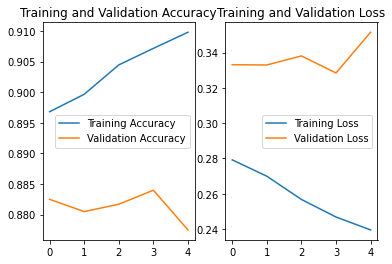

In [13]:
# -*- coding: utf-8 -*-
# !/usr/bin/python3
# author by : yuxiangShi
# email  by: 18538187569@163.com
# desc by: fashion通过建立模型的方式进行分类,模型保存

# 1.导入包
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import os
import numpy as np

np.set_printoptions(threshold=np.inf)


# 2.获取数据包,获取特征和数据,设置他的灰度值
fashion = tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion.load_data()
x_train,x_test = x_train / 255.0,x_test / 255.0

x_train = x_train.reshape(x_train.shape[0],28,28,1) # 给数据增加一个维度，使数据和网络结构匹配

image_gen_train = ImageDataGenerator(
    rescale=1. / 1.,  # 如为图像，分母为255时，可归至0～1
    rotation_range=45,  # 随机45度旋转
    width_shift_range=.15,  # 宽度偏移
    height_shift_range=.15,  # 高度偏移
    horizontal_flip=True,  # 水平翻转
    zoom_range=0.5  # 将图像随机缩放阈量50％
)


image_gen_train.fit(x_train)

# 3.创建模型
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')                               
])

# 4.分析模型
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

checkpoint_save_path = "./checkpoint/fashion.ckpt"
if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True)

# 5.训练模型
history = model.fit(x_train,y_train,batch_size=32,epochs=5,validation_data=(x_test,y_test),validation_freq=1,callbacks=[cp_callback])

# 6.输出结果和统计
model.summary()

print(model.trainable_variables)
file = open('./weights.txt', 'w')
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()


# 显示训练集和验证集的acc和loss曲线
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()



